In [1]:
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from matplotlib.legend_handler import HandlerLine2D
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
%matplotlib inline

data = pd.read_csv("data.csv", header = None)

X = data.loc[:, 0:5]
y = data.loc[:, 6]

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [2]:
gbc = GradientBoostingClassifier()

parameters = {
    "n_estimators":[5,10,50,100,200],
    "max_depth":[1,2,5,10],
    "learning_rate":[0.01,0.1, 0.5],
    'subsample':[0.6,0.8,1],
    'max_features':[2,4,6],
    'min_samples_split':[2,4,6],
    'min_samples_leaf':[1,2,3]
}

pprint(parameters)

{'learning_rate': [0.01, 0.1, 0.5],
 'max_depth': [1, 2, 5, 10],
 'max_features': [2, 4, 6],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [5, 10, 50, 100, 200],
 'subsample': [0.6, 0.8, 1]}


In [3]:
cv = GridSearchCV(gbc, parameters, cv=5, n_jobs=-1)
cv.fit(X_train, y_train)
cv.best_params_

C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.1,
 'max_depth': 2,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100,
 'subsample': 0.6}

In [4]:
best_cv = cv.best_estimator_
y_pred = best_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.7972027972027972

In [5]:
base = GradientBoostingClassifier()
base.fit(X_train, y_train)
y_pred = base.predict(X_test)
accuracy_score(y_pred, y_test)

0.7832167832167832

In [6]:
def results_base(estimators, X_train, y_train, X_test, y_test):
    results = []
    for i in range(len(estimators)):
        base_model = GradientBoostingClassifier(n_estimators = estimators[i])
        base_model.fit(X_train, y_train)
        y_pred = base_model.predict(X_test)
        results.append(accuracy_score(y_pred, y_test))
    return results

def results(model, estimators, X_train, y_train, X_test, y_test):
    results = []
    for i in range(len(estimators)):
        model.best_params_['n_estimators'] = estimators[i]
        params = model.best_params_
        model_ = GradientBoostingClassifier().set_params(**params)
        model_.fit(X_train, y_train)
        y_pred = model_.predict(X_test)
        results.append(accuracy_score(y_pred, y_test))
    return results

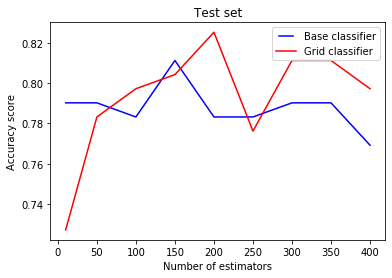

In [7]:
estimators = [10, 50, 100, 150, 200, 250, 300, 350, 400]

line1, = plt.plot(estimators, results_base(estimators, X_train, y_train, X_test, y_test), 'b', label="Base classifier")
line2, = plt.plot(estimators, results(cv, estimators, X_train, y_train, X_test, y_test), 'r', label="Grid classifier")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Number of estimators')
plt.title('Test set')
plt.show()

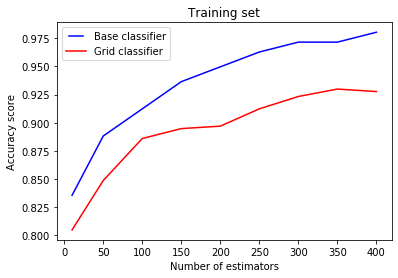

In [8]:
estimators = [10, 50, 100, 150, 200, 250, 300, 350, 400]

line1, = plt.plot(estimators, results_base(estimators, X_train, y_train, X_train, y_train), 'b', label="Base classifier")
line2, = plt.plot(estimators, results(cv, estimators, X_train, y_train, X_train, y_train), 'r', label="Grid classifier")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Number of estimators')
plt.title('Training set')
plt.show()